In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import precision_score, accuracy_score, f1_score, mean_squared_error
from tqdm import tqdm
import os
os.chdir("D:\\meridianthe4\\PML\\Datasets")

In [28]:
boston = pd.read_csv("Boston.csv")

In [30]:
X, y = boston.drop(columns=["medv"]), boston["medv"]
# le = LabelEncoder()
# y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [31]:
depths = [None, 3, 4, 5, 6, 7]
min_samples = [0.01, 0.025, 0.05, 0.1, 2, 10]
min_leafs = [1, 10, 0.025, 0.01, 0.05, 0.1]
scores = []
for depth in tqdm(depths):
    for min_sample in min_samples:
        for min_leaf in min_leafs:
            dtc = DecisionTreeRegressor(max_depth=depth, 
                                         min_samples_split=min_sample, 
                                         min_samples_leaf=min_leaf, 
                                         random_state=25)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score = mean_squared_error(y_test, y_pred)
            scores.append([depth, min_sample, min_leaf, score])
df_scores = pd.DataFrame(scores, columns=["max_depth", "min_samples_split", "min_samples_leaf", "score"])
df_scores.sort_values("score", ascending=True)

100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


,max_depth,min_samples_split,min_samples_leaf,score
129,5.0,0.100,0.01,14.925188
21,NaN,0.100,0.01,15.359114
111,5.0,0.010,0.01,15.393935
117,5.0,0.025,0.01,15.393935
135,5.0,2.000,0.01,15.393935
...,...,...,...,...
71,3.0,10.000,0.10,28.505385
47,3.0,0.025,0.10,28.505385
41,3.0,0.010,0.10,28.505385
53,3.0,0.050,0.10,28.505385


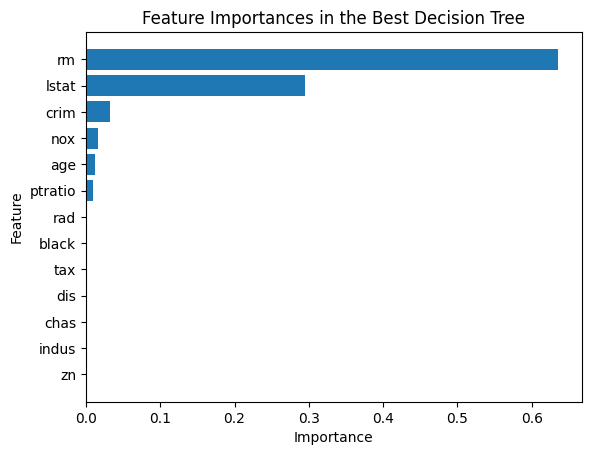

In [26]:
best_tree = DecisionTreeRegressor(random_state=25, max_depth=5, min_samples_split=10, min_samples_leaf=0.025)
best_tree.fit(X, y)
df_imp = pd.DataFrame({"feature": X.columns, "importance": best_tree.feature_importances_})
df_imp = df_imp.sort_values("importance")
import matplotlib.pyplot as plt
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in the Best Decision Tree")
plt.show()

## Concrete Strength Data

In [52]:
os.chdir("D:\\meridianthe4\\PML\\Cases\\Concrete_Strength")

In [66]:
concrete = pd.read_csv("Concrete_Data.csv")

In [67]:
X, y = concrete.drop(columns=["Strength"]), concrete["Strength"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
# sc =  StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [68]:
depths = [None, 3, 4, 5, 6, 7]
min_samples = [0.01, 0.025, 0.05, 0.1, 2, 10]
min_leafs = [1, 10, 0.025, 0.01, 0.05, 0.1]
scores = []
for depth in tqdm(depths):
    for min_sample in min_samples:
        for min_leaf in min_leafs:
            dtc = DecisionTreeRegressor(max_depth=depth, 
                                         min_samples_split=min_sample, 
                                         min_samples_leaf=min_leaf, 
                                         random_state=25)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score = mean_squared_error(y_test, y_pred)
            scores.append([depth, min_sample, min_leaf, score])
df_scores = pd.DataFrame(scores, columns=["max_depth", "min_samples_split", "min_samples_leaf", "score"])
df_scores.sort_values("score", ascending=True)

100%|██████████| 6/6 [00:00<00:00,  7.56it/s]


,max_depth,min_samples_split,min_samples_leaf,score
24,NaN,2.000,1.0,44.060492
0,NaN,0.010,1.0,51.975248
30,NaN,10.000,1.0,53.603358
204,7.0,2.000,1.0,55.717213
6,NaN,0.025,1.0,56.289698
...,...,...,...,...
71,3.0,10.000,0.1,128.381362
47,3.0,0.025,0.1,128.381362
41,3.0,0.010,0.1,128.381362
53,3.0,0.050,0.1,128.381362


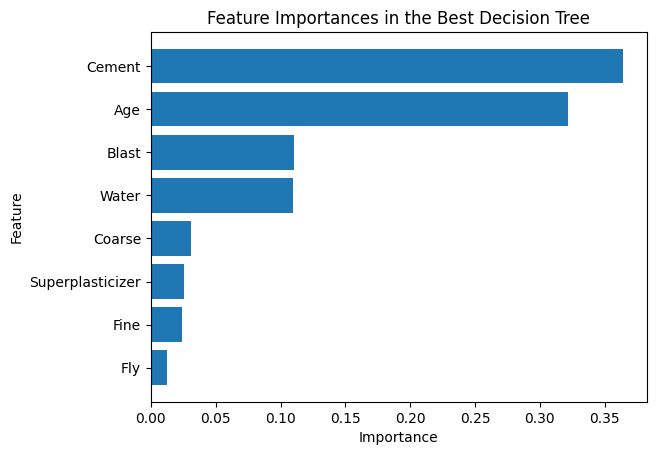

In [ ]:
best_tree = DecisionTreeRegressor(random_state=25, max_depth=None, min_samples_split=2, min_samples_leaf=1)
best_tree.fit(X, y)
df_imp = pd.DataFrame({"feature": X.columns, "importance": best_tree.feature_importances_})
df_imp = df_imp.sort_values("importance")
import matplotlib.pyplot as plt
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in the Best Decision Tree")
plt.show()